In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="----------------------------")
project = rf.workspace("mariomartuaa").project("attirely-color")
version = project.version(2)
dataset = version.download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycle

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Attirely-Color-2 in folder:: 100%|██████████| 7910/7910 [00:02<00:00, 3583.78it/s]


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import uuid

In [3]:
vtrain_color_datagen = ImageDataGenerator (rescale = 1./255,
                                         rotation_range=20,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest'
                                         )
color_train_generator = train_color_datagen.flow_from_directory(directory = '/content/Attirely-Color-2/train',
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    target_size = (28,28),
                                                          batch_size = 32)

validation_datagen = ImageDataGenerator (rescale = 1./255)
color_val_generator = validation_datagen.flow_from_directory(directory = '/content/Attirely-Color-2/valid',
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    target_size = (28,28),
                                                          batch_size = 32)



Found 6912 images belonging to 9 classes.
Found 976 images belonging to 9 classes.


In [4]:
color_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation= tf.keras.activations.relu, input_shape=(28,28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation= tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(9, activation= tf.keras.activations.softmax)
  ])


color_model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.87):
            self.model.stop_training = True
            print('Berhenti')

callbacks = myCallback()

In [6]:
history2 = color_model.fit(color_train_generator,
          epochs = 50,
          validation_data = color_val_generator,
                           callbacks = [callbacks])

Epoch 1/50
216/216 [==============================] - 23s 87ms/step - loss: 1.1244 - accuracy: 0.5936 - val_loss: 0.8390 - val_accuracy: 0.7029
Epoch 2/50
216/216 [==============================] - 19s 90ms/step - loss: 0.7697 - accuracy: 0.7422 - val_loss: 0.7978 - val_accuracy: 0.7377
Epoch 3/50
216/216 [==============================] - 19s 86ms/step - loss: 0.7162 - accuracy: 0.7548 - val_loss: 0.7604 - val_accuracy: 0.7408
Epoch 4/50
216/216 [==============================] - 19s 88ms/step - loss: 0.6638 - accuracy: 0.7794 - val_loss: 0.5967 - val_accuracy: 0.8053
Epoch 5/50
216/216 [==============================] - 19s 87ms/step - loss: 0.6195 - accuracy: 0.7911 - val_loss: 0.6166 - val_accuracy: 0.7910
Epoch 6/50
216/216 [==============================] - 19s 90ms/step - loss: 0.6091 - accuracy: 0.7960 - val_loss: 0.5246 - val_accuracy: 0.8238
Epoch 7/50
216/216 [==============================] - 18s 85ms/step - loss: 0.5864 - accuracy: 0.7990 - val_loss: 0.5279 - val_accuracy:

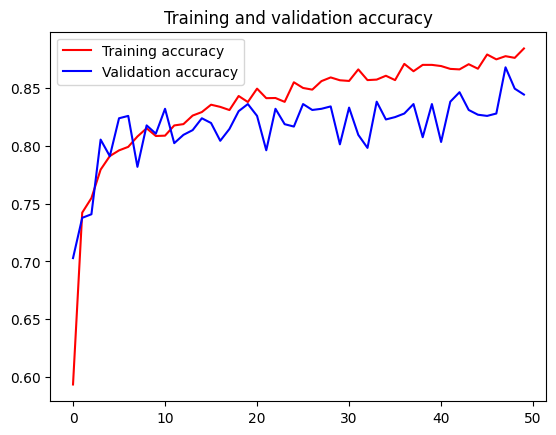

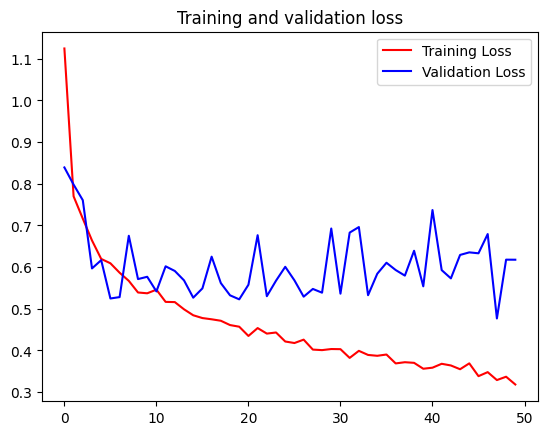

In [7]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

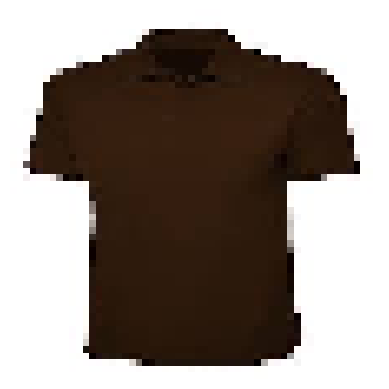

1/1 [==============================] - 0s 60ms/step
Black


In [ ]:
path = '/content/brown.jpeg'
# Memuat gambar dan mengubah ukurannya
img = load_img(path, target_size=(56, 56))
x = img_to_array(img)

plt.imshow(x.astype(int))
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()

x = np.expand_dims(x, axis=0)

color_class = color_model.predict(x)
color_class2 = np.argmax(color_class)

if color_class2 == 0:
    color_class3 = 'Black'
elif color_class2 == 1:
    color_class3 = 'Blue'
elif color_class2 == 2:
    color_class3 = 'Brown'
elif color_class2 == 3:
    color_class3 = 'Green'
elif color_class2 == 4:
    color_class3 = 'Grey'
elif color_class2 == 5:
    color_class3 = 'Pink'
elif color_class2 == 6:
    color_class3 = 'Red'
elif color_class2 == 7:
    color_class3 = 'White'
else:
    color_class3 = 'Yellow'

print(color_class3)

In [ ]:
color_model.save('color_model_toboflow_28.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
from tensorflow import keras

# Step 1: Load the H5 model
color_model2 = keras.models.load_model('color_model_toboflow_28.h5')

# Step 2: Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(color_model2)

# Optional: Apply optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Step 3: Save the converted model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
